In [128]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from utils.kde import smooth
wl = [i for i in range(660, 921)]
%matplotlib inline

### 觀察穩定(30sec)

In [2]:
data = np.loadtxt("data/raw/20190524/IJV/live/live_1_1.csv", delimiter=",")
calib_wl = np.loadtxt("data/raw/20190524/IJV/calib_wl.csv", delimiter=",")

In [11]:
data_interp = []
for i in range(data.shape[0]):
     data_interp += [np.interp(wl, calib_wl, data[i, :])]
data_interp = np.asarray(data_interp)
data = data_interp

In [30]:
print("檔案格式(秒, 波長數): ", data.shape)

檔案格式(秒, 波長數):  (1191, 261)


### 確認各波長隨時間改變趨勢一樣

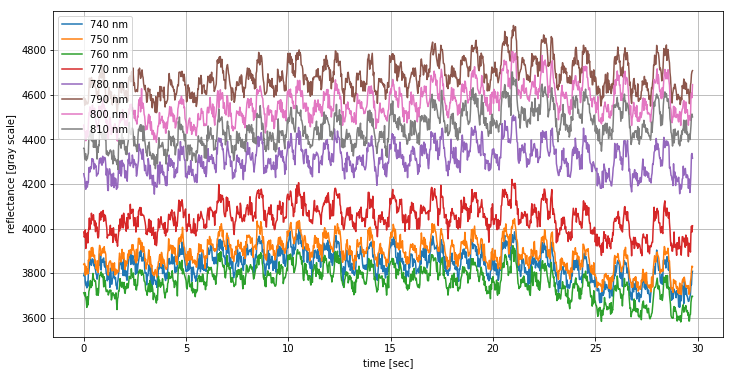

In [27]:
plt.figure(figsize=(12, 6))
for i in range(740, 811, 10):
    plt.plot(data[:, i-660], label="{} nm".format(i))
plt.xlabel("time [sec]")
plt.ylabel("reflectance [gray scale]")
plt.grid()
plt.legend()
plt.xticks([i for i in range(0, 1201, 200)], labels=[str(int(i/20)) for i in range(0, 1201, 100)])
plt.show()

### 確認一樣後，直接計算平均

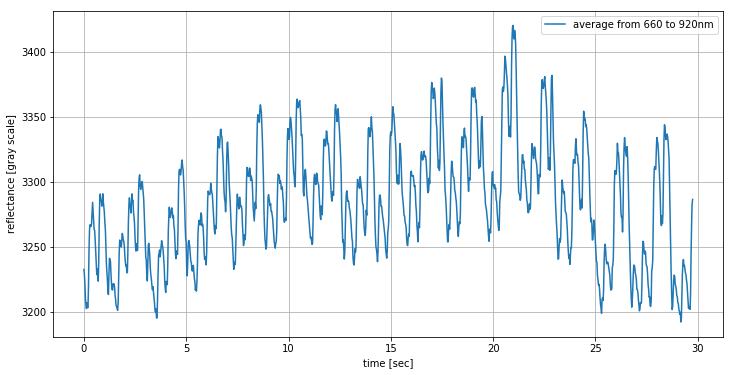

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(data.mean(1), label="average from 660 to 920nm")
plt.xlabel("time [sec]")
plt.ylabel("reflectance [gray scale]")
plt.grid()
plt.legend()
plt.xticks([i for i in range(0, 1201, 200)], labels=[str(int(i/20)) for i in range(0, 1201, 100)])
plt.show()

# 過度換氣

In [99]:
data = np.loadtxt("data/raw/20190524/IJV/live/live_2_1.csv", delimiter=",")
calib_wl = np.loadtxt("data/raw/20190524/IJV/calib_wl.csv", delimiter=",")

data_interp = []
for i in range(data.shape[0]):
     data_interp += [np.interp(wl, calib_wl, data[i, :])]
data_interp = np.asarray(data_interp)
data = data_interp
print("檔案格式(秒, 波長數): ", data.shape)

檔案格式(秒, 波長數):  (15220, 261)


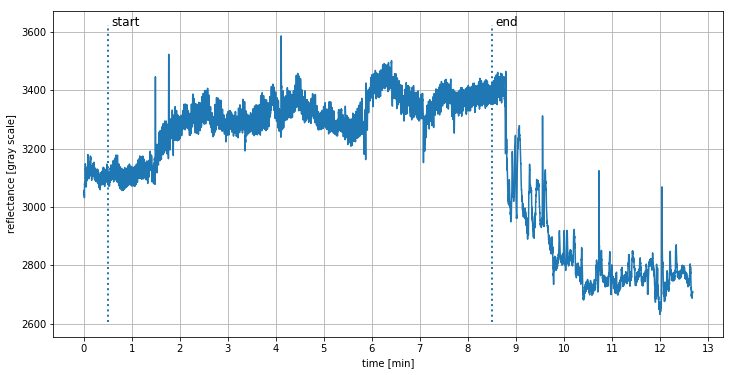

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(data.mean(1))
for text, time in zip(["start", "end"], [600, 10200]):
    plt.plot(
        [time, time], 
        [data.mean(1).min()*0.99, data.mean(1).max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data.mean(1).max()*1.01, text, fontsize=12)

plt.xticks([i for i in range(0, 16000, 1200)], labels=[str(int(i/1200)) for i in range(0, 16000, 1200)])
plt.grid()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

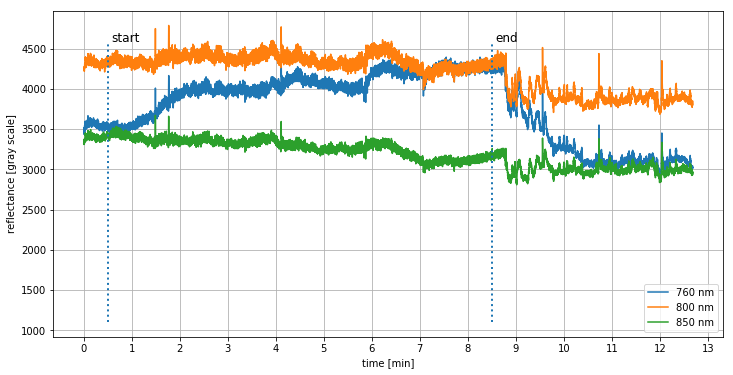

In [94]:
plt.figure(figsize=(12, 6))
wl_select = [760, 800, 850]
for i in wl_select:
    plt.plot(data[:, i-660], label="{} nm".format(i))
    
    
for text, time in zip(["start", "end"], [600, 10200]):
    plt.plot(
        [time, time], 
        [data[wl_select].min()*0.99, data[wl_select].max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data[wl_select].max()*1.01, text, fontsize=12)

    
plt.xticks([i for i in range(0, 16000, 1200)], labels=[str(int(i/1200)) for i in range(0, 16000, 1200)])
plt.grid()
plt.legend()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

Text(0.5, 1.0, 'before')

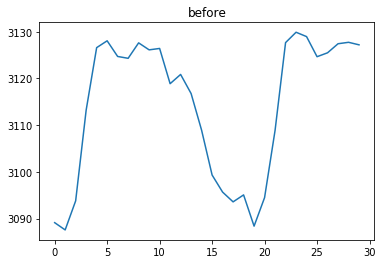

In [106]:
plt.plot(data[300:330].mean(1))
plt.title("before")

In [123]:
i = 310
j = 319
# plt.plot(data[300:330].mean(1))
# plt.scatter(i-300, data[300:330].mean(1)[i-300])
# plt.scatter(j-300, data[300:330].mean(1)[j-300])

# plt.title("baseline")
# plt.show()

In [124]:
i = 9610
j = 9630
# plt.plot(data[9600:9650].mean(1))
# plt.scatter(i-9600, data[9600:9650].mean(1)[i-9600])
# plt.scatter(j-9600, data[9600:9650].mean(1)[j-9600])

# plt.title("hypoventilation")
# plt.show()

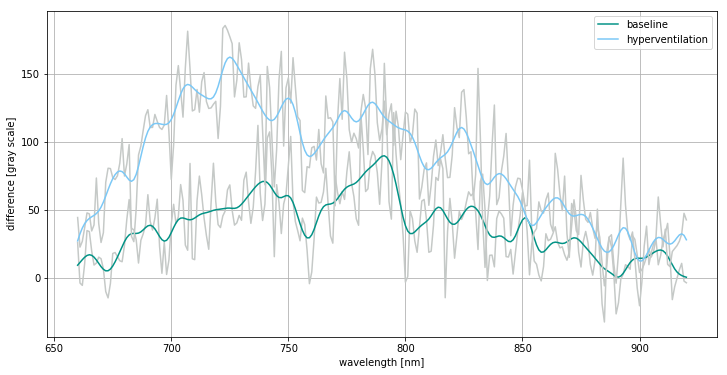

In [146]:
plt.figure(figsize=(12, 6))
plt.plot(wl, data[310, :] - data[319, :], color="xkcd:silver")
plt.plot(wl, smooth(data[310, :], 3) - smooth(data[319, :], 3), color="xkcd:teal", label="baseline")

plt.plot(wl, data[9610, :] - data[9630, :], color="xkcd:silver")
plt.plot(wl, smooth(data[9610, :], 3) - smooth(data[9630, :], 3), color="xkcd:lightblue", label="hyperventilation")

plt.grid()
plt.legend()
plt.xlabel("wavelength [nm]")
plt.ylabel("difference [gray scale]")
plt.show()

No handles with labels found to put in legend.


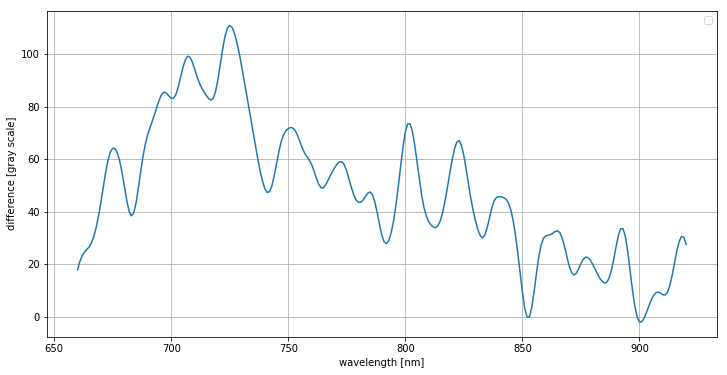

In [147]:
plt.figure(figsize=(12, 6))
hyp = smooth(data[9610, :], 3) - smooth(data[9630, :], 3)
base = smooth(data[310, :], 3) - smooth(data[319, :], 3)

plt.plot(wl, hyp-base)

plt.grid()
plt.legend()
plt.xlabel("wavelength [nm]")
plt.ylabel("difference [gray scale]")
plt.show()

In [95]:
data = np.loadtxt("data/raw/20190524/IJV/live/live_2_2.csv", delimiter=",")
calib_wl = np.loadtxt("data/raw/20190524/IJV/calib_wl.csv", delimiter=",")

data_interp = []
for i in range(data.shape[0]):
     data_interp += [np.interp(wl, calib_wl, data[i, :])]
data_interp = np.asarray(data_interp)
data = data_interp
print("檔案格式(秒, 波長數): ", data.shape)

檔案格式(秒, 波長數):  (12987, 261)


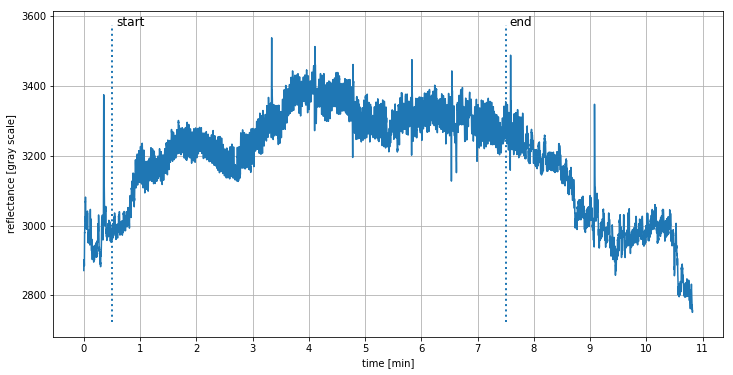

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(data.mean(1))
for text, time in zip(["start", "end"], [600, 9000]):
    plt.plot(
        [time, time], 
        [data.mean(1).min()*0.99, data.mean(1).max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data.mean(1).max()*1.01, text, fontsize=12)

plt.xticks([i for i in range(0, 13600, 1200)], 
           labels=[str(int(i/1200)) for i in range(0, 13600, 1200)])
plt.grid()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

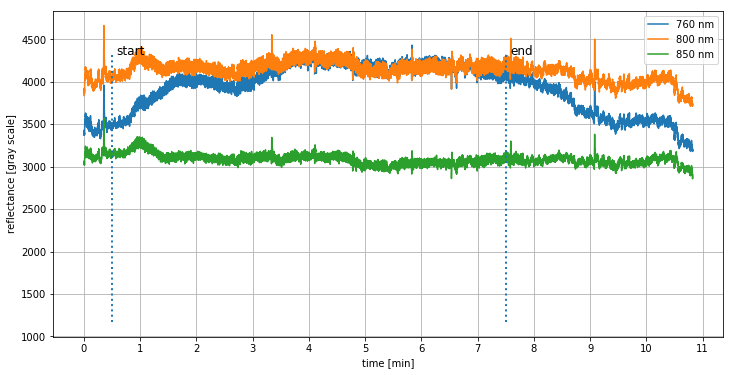

In [96]:
plt.figure(figsize=(12, 6))
wl_select = [760, 800, 850]
for i in wl_select:
    plt.plot(data[:, i-660], label="{} nm".format(i))
    
    
for text, time in zip(["start", "end"], [600, 9000]):
    plt.plot(
        [time, time], 
        [data[wl_select].min()*0.99, data[wl_select].max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data[wl_select].max()*1.01, text, fontsize=12)

    
plt.xticks([i for i in range(0, 13600, 1200)], 
           labels=[str(int(i/1200)) for i in range(0, 13600, 1200)])
plt.grid()
plt.legend()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

In [97]:
data = np.loadtxt("data/raw/20190524/IJV/live/live_2_3.csv", delimiter=",")
calib_wl = np.loadtxt("data/raw/20190524/IJV/calib_wl.csv", delimiter=",")

data_interp = []
for i in range(data.shape[0]):
     data_interp += [np.interp(wl, calib_wl, data[i, :])]
data_interp = np.asarray(data_interp)
data = data_interp
print("檔案格式(秒, 波長數): ", data.shape)

檔案格式(秒, 波長數):  (13828, 261)


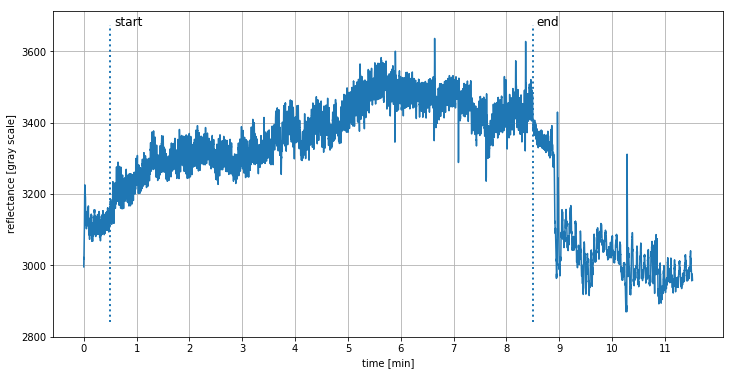

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(data.mean(1))
for text, time in zip(["start", "end"], [600, 10200]):
    plt.plot(
        [time, time], 
        [data.mean(1).min()*0.99, data.mean(1).max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data.mean(1).max()*1.01, text, fontsize=12)

plt.xticks([i for i in range(0, 13600, 1200)], 
           labels=[str(int(i/1200)) for i in range(0, 13600, 1200)])
plt.grid()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

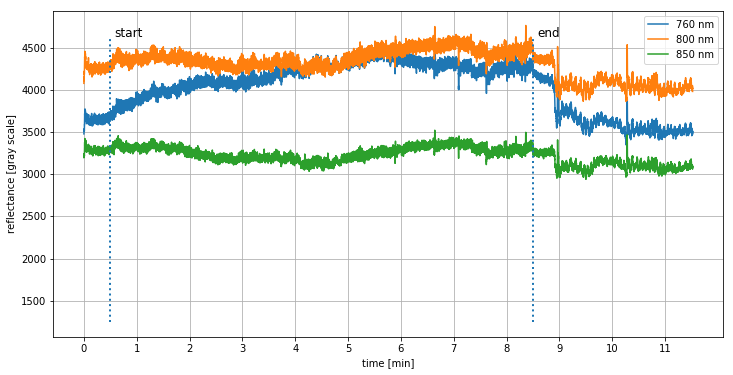

In [98]:
plt.figure(figsize=(12, 6))
wl_select = [760, 800, 850]
for i in wl_select:
    plt.plot(data[:, i-660], label="{} nm".format(i))
    
    
for text, time in zip(["start", "end"], [600, 10200]):
    plt.plot(
        [time, time], 
        [data[wl_select].min()*0.99, data[wl_select].max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data[wl_select].max()*1.01, text, fontsize=12)

    
plt.xticks([i for i in range(0, 13600, 1200)], 
           labels=[str(int(i/1200)) for i in range(0, 13600, 1200)])
plt.grid()
plt.legend()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

# 吸氧氣

In [72]:
data = np.loadtxt("data/raw/20190524/IJV/live/live_3_1.csv", delimiter=",")
calib_wl = np.loadtxt("data/raw/20190524/IJV/calib_wl.csv", delimiter=",")

data_interp = []
for i in range(data.shape[0]):
     data_interp += [np.interp(wl, calib_wl, data[i, :])]
data_interp = np.asarray(data_interp)
data = data_interp
print("檔案格式(秒, 波長數): ", data.shape)

檔案格式(秒, 波長數):  (4882, 261)


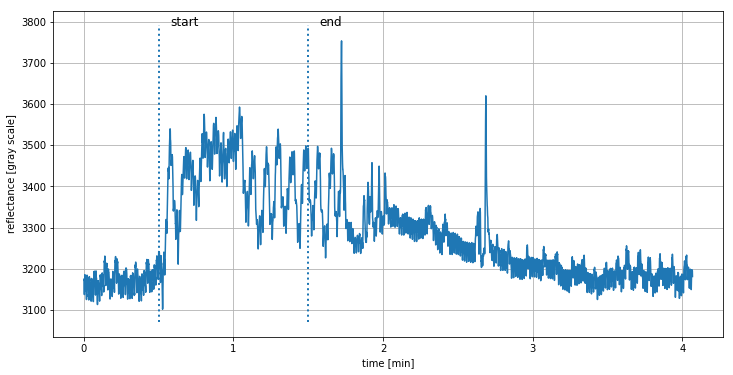

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(data.mean(1))
for text, time in zip(["start", "end"], [600, 1800]):
    plt.plot(
        [time, time], 
        [data.mean(1).min()*0.99, data.mean(1).max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data.mean(1).max()*1.01, text, fontsize=12)

plt.xticks([i for i in range(0, 4801, 1200)], 
           labels=[str(int(i/1200)) for i in range(0, 4801, 1200)])
plt.grid()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

In [76]:
data = np.loadtxt("data/raw/20190524/IJV/live/live_3_2.csv", delimiter=",")
calib_wl = np.loadtxt("data/raw/20190524/IJV/calib_wl.csv", delimiter=",")

data_interp = []
for i in range(data.shape[0]):
     data_interp += [np.interp(wl, calib_wl, data[i, :])]
data_interp = np.asarray(data_interp)
data = data_interp
print("檔案格式(秒, 波長數): ", data.shape)

檔案格式(秒, 波長數):  (6681, 261)


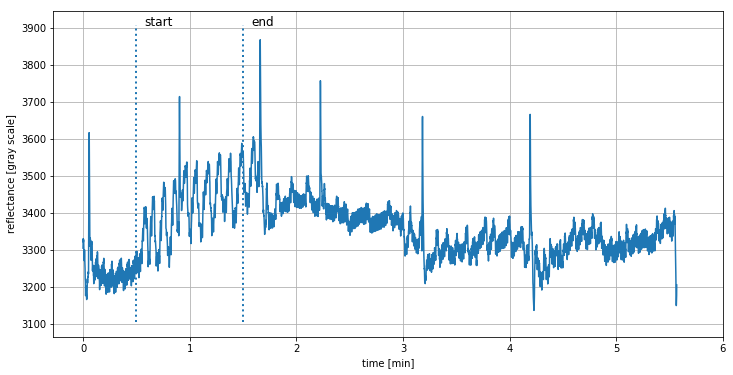

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(data.mean(1))
for text, time in zip(["start", "end"], [600, 1800]):
    plt.plot(
        [time, time], 
        [data.mean(1).min()*0.99, data.mean(1).max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data.mean(1).max()*1.01, text, fontsize=12)

plt.xticks([i for i in range(0, 7201, 1200)], 
           labels=[str(int(i/1200)) for i in range(0, 7201, 1200)])
plt.grid()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()

In [78]:
data = np.loadtxt("data/raw/20190524/IJV/live/live_3_3.csv", delimiter=",")
calib_wl = np.loadtxt("data/raw/20190524/IJV/calib_wl.csv", delimiter=",")

data_interp = []
for i in range(data.shape[0]):
     data_interp += [np.interp(wl, calib_wl, data[i, :])]
data_interp = np.asarray(data_interp)
data = data_interp
print("檔案格式(秒, 波長數): ", data.shape)

檔案格式(秒, 波長數):  (5666, 261)


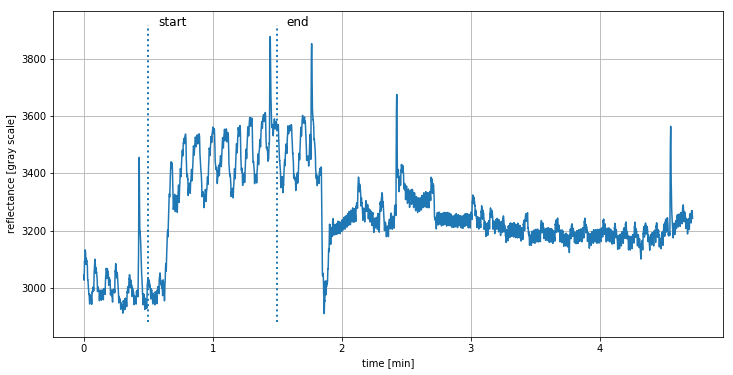

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(data.mean(1))
for text, time in zip(["start", "end"], [600, 1800]):
    plt.plot(
        [time, time], 
        [data.mean(1).min()*0.99, data.mean(1).max()*1.01], 
        color="C0",
        linestyle=":",
        linewidth=2
    )

    plt.text(time+90, data.mean(1).max()*1.01, text, fontsize=12)

plt.xticks([i for i in range(0, 6000, 1200)], 
           labels=[str(int(i/1200)) for i in range(0, 6000, 1200)])
plt.grid()

plt.xlabel("time [min]")
plt.ylabel("reflectance [gray scale]")
plt.show()